## EVOLUÇÃO ALUNOS MATRICULADOS QUEROEDUCACAO


##### Passos anteriores de retore de dump, processamento e  extração de dados foram feitos no postgree



### Importando arquivos que foram extraídos do Postgree

In [5]:
#### MELHORIA FUTURA: Fazer a importação de forma genérica -- Resolvido em 11-06-2019

import os
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt

file_location = 'C:\\Users\\User\\Desktop\\CaseQueroEducacao\\Dados\\'


files=os.listdir(file_location)

dict_df = {}

for file in files:
    dict_df["df{0}".format(file)] = pd.read_csv(file_location + file,sep = ';')

#dict_df

### EVOLUÇÃO DAS MATRICULAS



In [10]:
#### MELHORIA FUTURA: Sumarizar a matricula sem repetição de código -- RESOLVIDO EM 11-06-2019


pd_hist = pd.DataFrame()

for key in dict_df.keys():
   #pd_hist = pd.append(pd.DataFrame({"year":[key[12:]] ,"sum_matricula": dict_df[key]["qt_matricula_curso"].sum()})
    pd_hist = pd_hist.append(pd.DataFrame({"year":[key[12:]] ,"sum_matricula": dict_df[key]["qt_matricula_curso"].sum()}))


In [11]:
pd_hist.set_index('year')

,sum_matricula
year,
2009,11971746.0
2010,12815466.0
2011,13531080.0
2012,14116168.0
2013,14645928.0
2014,15679530.0
2015,16067148.0
2016,16104508.0


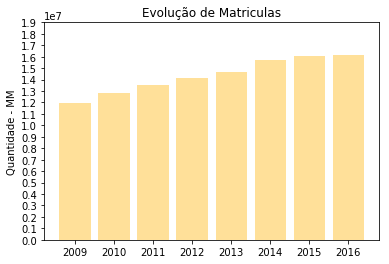

In [40]:
### MELHORIA FUTURA: Melhorar design do gráfico, inserir títulos e detalhes -- RESOLVIDO EM 11-06-2019

fig = plt.figure()
ax = fig.gca()

xs = pd_hist["year"]
ys = pd_hist["sum_matricula"]

ax.bar(xs, ys, color = (1,0.7,0),alpha = 0.4)

plt.ylabel('Quantidade - MM')
plt.title('Evolução de Matriculas')
plt.yticks(np.arange(0, 20000000, 1000000))


plt.show()

## MÉDIA MÓVEL 2 ANOS

In [30]:
pd_hist.set_index('year')  
        
pd_hist

,year,sum_matricula
0,2009,11971746.0
0,2010,12815466.0
0,2011,13531080.0
0,2012,14116168.0
0,2013,14645928.0
0,2014,15679530.0
0,2015,16067148.0
0,2016,16104508.0


In [31]:
#pd_hist.Series(sum_matricula).rolling(window=2).mean()

pd_hist["mms_2anos"] = pd_hist["sum_matricula"].rolling(window=2).mean()

In [32]:
pd_hist

,year,sum_matricula,mms_2anos
0,2009,11971746.0,NaN
0,2010,12815466.0,12393606.0
0,2011,13531080.0,13173273.0
0,2012,14116168.0,13823624.0
0,2013,14645928.0,14381048.0
0,2014,15679530.0,15162729.0
0,2015,16067148.0,15873339.0
0,2016,16104508.0,16085828.0


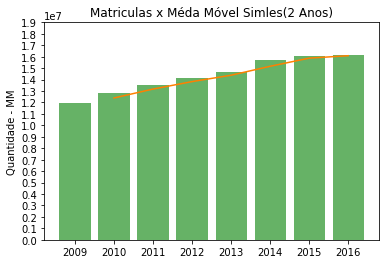

In [41]:

fig = plt.figure()
ax = fig.gca()

xs = pd_hist["year"]
ys_bar  = pd_hist["sum_matricula"]
ys_line = pd_hist["mms_2anos"]

ax.bar(xs, ys_bar, color = 'g', alpha = 0.6)
ax.plot(xs, ys_line, color = (1, 0.5, 0))

plt.ylabel('Quantidade - MM')
plt.title('Matriculas x Méda Móvel Simles(2 Anos)')
plt.yticks(np.arange(0, 20000000, 1000000))

plt.show()


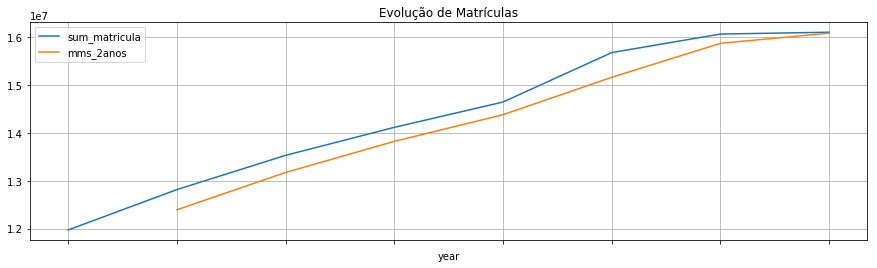

In [34]:
pd_hist.set_index('year')[['sum_matricula', 'mms_2anos']].plot(figsize=(15, 4), title='Evolução de Matrículas', grid=True)

### EXPORTANDO O DATAFRAME PARA O EXCEL

In [130]:
pd_hist.to_csv(file_location + 'EvolucaoMatriculas.csv')